In [1]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [54]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#Bayesian linear regression
import pymc3 as pm

In this project, we'll be comparing Bayesian linear regression to ridge regression, OLS regression and random forest regression. The dataset is the student grades dataset found in the UCI Machine Learning Repository. This report is a redacted version of a report I submitted for my statistical data analysis module as part of my Master's degree.

Bayesian linear regression is a combination of Bayesian inference and traditional linear regression. Rather than just providing a single predictive figure as a regular linear regression would, Bayesian linear regression returns a distribution, highlighting the likelihood of a particular outcome being in that range, thus giving us a level of confidence that the true figure will lie within a specific range. This can be extremely useful in situations such as investments, where although the exact return might not be possible to predict, having a distribution based on priors gives the investor a distribution for their return, allowing them to see the chances of having both a higher and lower return than expected, as well as being able to retrospectively judge their actual returns against their projected BLR distribution, and updating the model.


In [77]:
# Math Grades
d1=pd.read_csv("/Users/tatendakanyere/SDA/student/student-mat.csv",sep=None,engine='python') 
# Portugese Grades
d2=pd.read_csv("/Users/tatendakanyere/SDA/student/student-por.csv",sep=None,engine='python') 
# Merged data
d3=pd.merge(d1,d2, on = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet",])
pd.set_option('display.max_columns', None)
d3.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_x,traveltime_x,studytime_x,failures_x,schoolsup_x,famsup_x,paid_x,activities_x,nursery,higher_x,internet,romantic_x,famrel_x,freetime_x,goout_x,Dalc_x,Walc_x,health_x,absences_x,G1_x,G2_x,G3_x,guardian_y,traveltime_y,studytime_y,failures_y,schoolsup_y,famsup_y,paid_y,activities_y,higher_y,romantic_y,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11,mother,1,2,0,no,no,no,no,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6,mother,2,2,0,yes,yes,no,no,yes,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19,mother,1,2,0,no,yes,no,no,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15,mother,1,2,0,no,yes,no,yes,yes,no,5,5,1,1,1,5,0,12,12,13


After peeking at the data, we are now going to explore the data and see what kind of data we're dealing with. We'll be using a series of visualisations to explore the data.

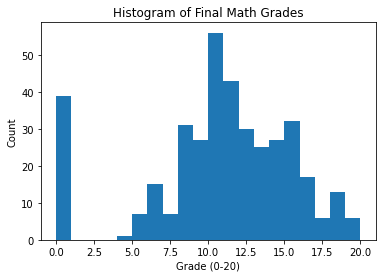

In [4]:
# Histogram of math grades
plt.hist(d3['G3_x'], bins = 20)
plt.xlabel('Grade (0-20)')
plt.ylabel('Count')
plt.title('Histogram of Final Math Grades')
plt.show()

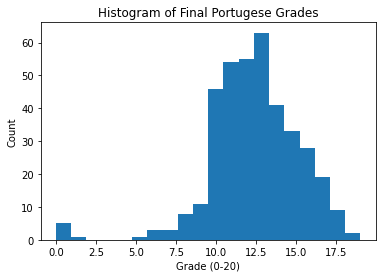

In [5]:
# Histogram of portugese grades
plt.hist(d3['G3_y'], bins = 20)
plt.xlabel('Grade (0-20)')
plt.ylabel('Count')
plt.title('Histogram of Final Portugese Grades')
plt.show()

Text(0.5, 1.0, 'Boxplot of Overall Score')

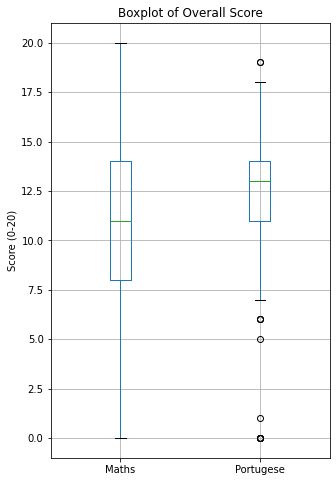

In [6]:
# Boxplot of the maths and Portuguese grades.
plt.figure(figsize=(5,8))
bp=d3.boxplot(column=['G3_x','G3_y'])
bp.set_xticklabels(['Maths','Portugese'])
bp.set_ylabel('Score (0-20)')
bp.set_title('Boxplot of Overall Score')

Text(0.5, 1.0, 'Math Score By Adrress and Sex')

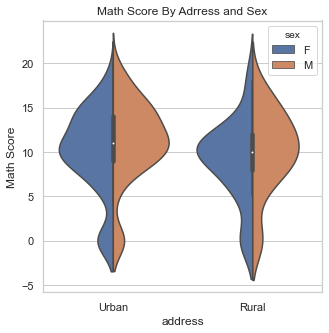

In [7]:
# Violin plot comparing the distribution of grades by sex and location
sns.set(style='whitegrid')
plt.figure(figsize=(5,5))
vp=sns.violinplot(y='G3_x',x='address',hue='sex',data=d3,split=True)
vp.set_xticklabels(['Urban','Rural'])
vp.set_ylabel('Math Score')
vp.set_title('Math Score By Adrress and Sex')

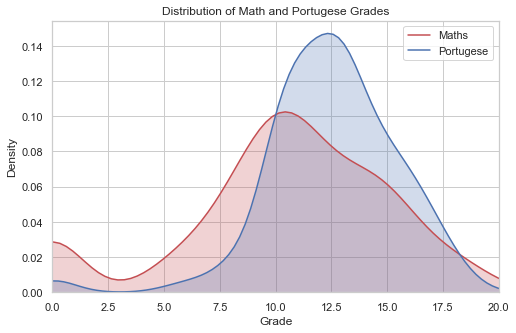

In [8]:
#Plot distributions for a range of features (cat. and num.)
#Plot by Subject
plt.figure(figsize=(8,5))
plt.xlim(0,20)
plt.xlabel('Grade')
plt.ylabel('Density')
p1=sns.kdeplot(d3['G3_x'],shade=True,label='Maths',color='r')
p1=sns.kdeplot(d3['G3_y'],shade=True,label='Portugese',color='b')
plt.title('Distribution of Math and Portugese Grades')
plt.show()

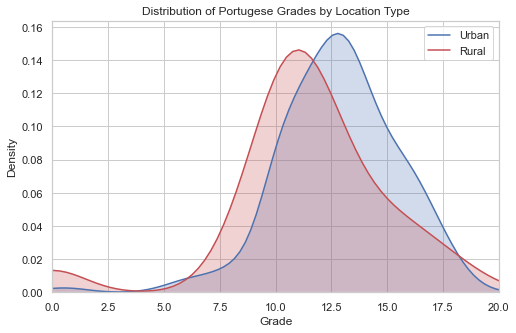

In [9]:
#Plot Portuguese grades by location Type
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['address']=='U'),'G3_y'],color='b',label='Urban',shade=
            True)
sns.kdeplot(d3.loc[(d3['address']=='R'),'G3_y'],color='r',label='Rural',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Portugese Grades by Location Type')
plt.show()

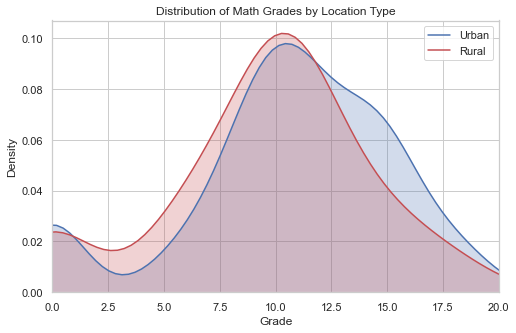

In [10]:
# Plot math grades by location type
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['address']=='U'),'G3_x'],color='b',label='Urban',shade=
            True)
sns.kdeplot(d3.loc[(d3['address']=='R'),'G3_x'],color='r',label='Rural',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Math Grades by Location Type')
plt.show()

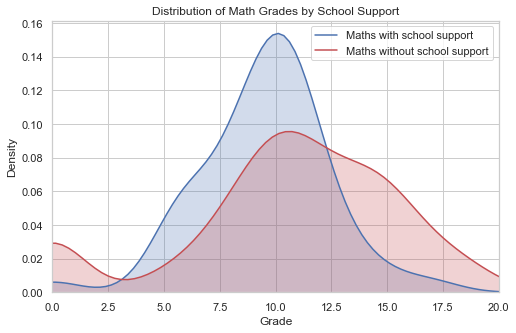

In [11]:
# Difference of math grades distribution by school support
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['schoolsup_x']=='yes'),'G3_x'],color='b',label='Maths with school support',shade=
            True)
sns.kdeplot(d3.loc[(d3['schoolsup_y']=='no'),'G3_x'],color='r',label='Maths without school support',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Math Grades by School Support')
plt.show()

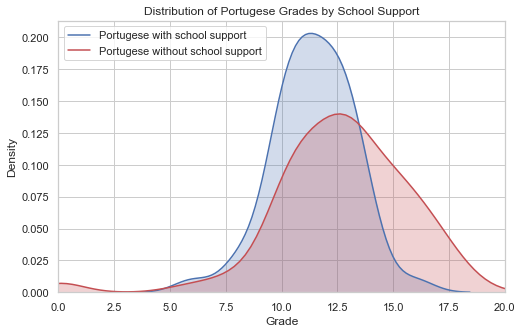

In [12]:
# Difference of Portuguese grades distribution by school support
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['schoolsup_x']=='yes'),'G3_y'],color='b',label='Portugese with school support',shade=
            True)
sns.kdeplot(d3.loc[(d3['schoolsup_y']=='no'),'G3_y'],color='r',label='Portugese without school support',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Portugese Grades by School Support')
plt.show()

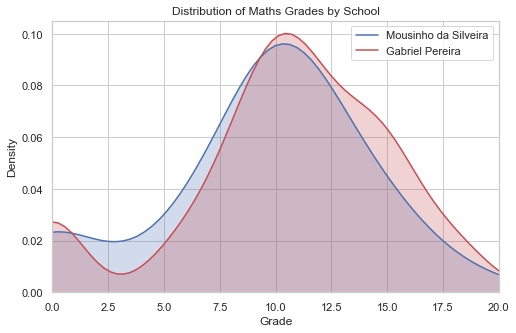

In [13]:
# Comparing math grade distributions by school
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['school']=='MS'),'G3_x'],color='b',label='Mousinho da Silveira',shade=
            True)
sns.kdeplot(d3.loc[(d3['school']=='GP'),'G3_x'],color='r',label='Gabriel Pereira',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Maths Grades by School')
plt.show()

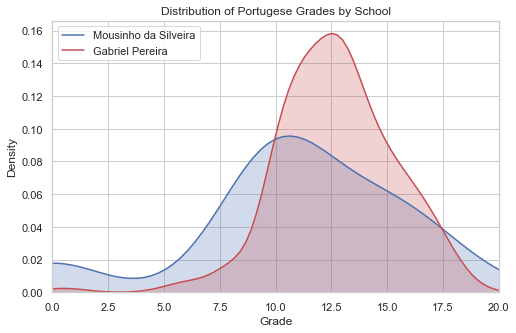

In [14]:
# Comparing Portuguese grade distributions by school
plt.figure(figsize=(8,5))
sns.kdeplot(d3.loc[(d3['school']=='MS'),'G3_y'],color='b',label='Mousinho da Silveira',shade=
            True)
sns.kdeplot(d3.loc[(d3['school']=='GP'),'G3_y'],color='r',label='Gabriel Pereira',shade=
            True)
plt.xlim(0,20) #X-axis limit set as grades can only be between 0-20
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Portugese Grades by School')
plt.show()

Now that we've produced a number of distributions and visualisations for our features, let's decide on which of them correlate the most with grades. Unfortunately this is not possible with both sets of data, the dataset to be used from now will be the maths dataset.

In [78]:
# Looking at the basic statistical features of the columns
d1.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [56]:
# Numerical variables that are most correlated with the final grade (pearson's correlation coefficient)
d1.corr()['G3'].sort_values()

failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

Pearson's correlation coefficient scores between -1 and 1, where -1= perfectly negatively correlated, 0= no correlation and 1= perfectly positively correlated.
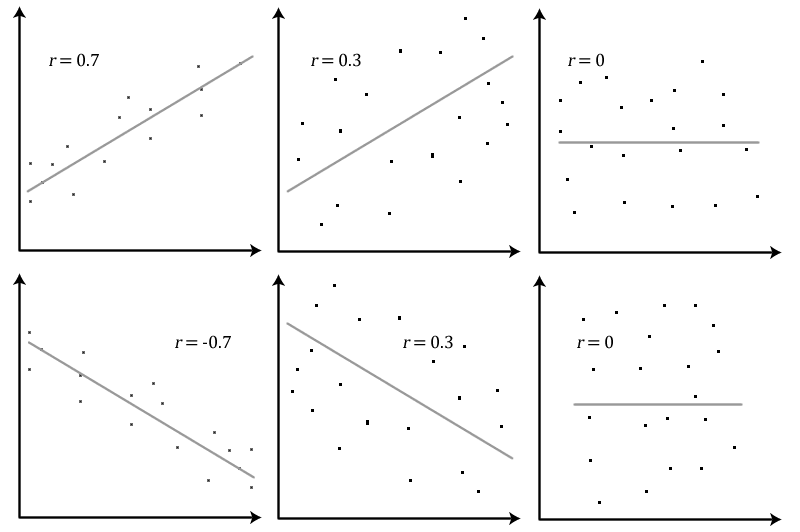

In [57]:
# One-hot encoding and correlating the categorical variables against the final grades
cat_d1=d1.select_dtypes(object)
dummy_d1=pd.get_dummies(cat_d1)
dummy_d1['G3']=d1['G3']
dummy_d1.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

Up next, feature selection!

In [79]:
# Function for the highest correlated variables
def most_correlated(d1):
    #Unnecessary or too highly correlted variables
    d1 = d1.drop(columns=['school', 'G1', 'G2'])
    
    # One-Hot Encoding of Categorical Variables
    d1 = pd.get_dummies(d1)
    
    # Find correlations with the Grade regardless of direction
    most_correlated = d1.corr().abs()['G3'].sort_values(ascending=False)
    
    #Pull the top 6 correlations
    most_correlated = most_correlated[:8]
    
    #Add the categorical variables and remove the binary opposite variable
    d1 = d1.loc[:, most_correlated.index]
    d1 = d1.drop(columns = ['higher_no'])
    
    return d1
    
d1=most_correlated(d1)

In [80]:
# Split into train/test, labels= target data
def train_test(d1):
    labels = d1['G3']
    X_train, X_test, y_train, y_test = train_test_split(d1, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test
train_test(d1)

(     G3  failures  Medu  higher_yes  age  Fedu  goout
 16   14         0     4           1   16     4      3
 66   12         0     4           1   15     4      3
 211  13         0     4           1   17     4      5
 7     6         0     4           1   17     4      4
 19   10         0     4           1   16     3      3
 ..   ..       ...   ...         ...  ...   ...    ...
 71   10         0     4           1   15     2      3
 106   8         0     2           1   15     2      2
 270   9         2     3           1   19     3      5
 348  15         0     4           1   17     3      3
 102  14         0     4           1   15     4      3
 
 [296 rows x 7 columns],      G3  failures  Medu  higher_yes  age  Fedu  goout
 78   10         3     2           0   17     1      1
 371  12         0     1           0   18     2      3
 248   5         1     3           1   18     3      3
 55   10         0     2           1   16     1      4
 390   9         2     2           1   

In [60]:
# Let's have a look at our training set to make sure it's correct
X_train, X_test, y_train, y_test = train_test(d1)
X_train.head()

,G3,failures,Medu,higher_yes,age,Fedu,goout
16,14,0,4,1,16,4,3
66,12,0,4,1,15,4,3
211,13,0,4,1,17,4,5
7,6,0,4,1,17,4,4
19,10,0,4,1,16,3,3


In [61]:
 # Rename variables in train and test
X_train = X_train.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu',
                                 'goout': 'go_out'})

X_test = X_test.rename(columns={'higher_yes': 'higher_edu', 
                                  'Medu': 'mother_edu',
                                  'Fedu': 'father_edu',
                                 'goout': 'go_out'})

In [62]:
X_train.head()

,G3,failures,mother_edu,higher_edu,age,father_edu,go_out
16,14,0,4,1,16,4,3
66,12,0,4,1,15,4,3
211,13,0,4,1,17,4,5
7,6,0,4,1,17,4,4
19,10,0,4,1,16,3,3


In [29]:
# Checking the shape of the data
print(X_train.shape)
print(X_test.shape)

(296, 7)
(99, 7)


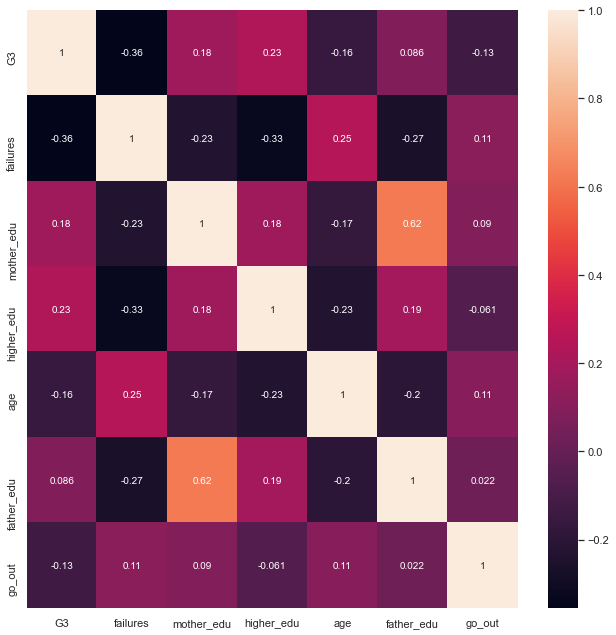

In [82]:
#Correlation matrix showing the Pearson's correlation coefficient of all variable relationships
plt.figure(figsize=(11,11))
corrMatrix = X_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [63]:
# Calculate mae and rmse
def metrics(predictions, observed):
    mae = np.mean(abs(predictions - observed))
    rmse = np.sqrt(np.mean((predictions - observed) ** 2))
    
    return mae, rmse

In [64]:
# Function to compare statistical models.
def compare(X_train, X_test, y_train, y_test):
    # Models to test
    model_name = ['Linear Regression','Random Forest',
                       'Ridge']
    X_train = X_train.drop(columns='G3')
    X_test = X_test.drop(columns='G3')
    
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=50)
    model3 = Ridge(alpha=1.0)
    
    # Dataframe
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name)
    
    # Train and test models for comparison
    for i, model in enumerate([model1, model2, model3]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model = model_name[i]
        results.loc[model, :] = [mae, rmse]
    
    return results

In [65]:
results=compare(X_train, X_test, y_train, y_test)

In [66]:
# Formula for Bayesian Linear Regression
formula = 'G3 ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'G3 ~ failures + mother_edu + higher_edu + age + father_edu + go_out'

In [67]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires the BLR formula and data
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    n_trace = pm.sample(draws=2000, chains = 2, tune = 500, target_accept=0.9)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, go_out, father_edu, age, higher_edu, mother_edu, failures, Intercept]
Sampling 2 chains, 0 divergences: 100%|██████████| 5000/5000 [00:45<00:00, 108.94draws/s]


In [70]:
# Print out the mean variable weight from the trace
for variable in n_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(n_trace[variable])))

Variable: Intercept       Mean weight in model: 12.1396
Variable: failures        Mean weight in model: -1.7785
Variable: mother_edu      Mean weight in model: 0.7221
Variable: higher_edu      Mean weight in model: 2.1258
Variable: age             Mean weight in model: -0.1504
Variable: father_edu      Mean weight in model: -0.5326
Variable: go_out          Mean weight in model: -0.3983
Variable: sd_log__        Mean weight in model: 1.4261
Variable: sd              Mean weight in model: 4.1663


In [71]:
pm.summary(n_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,12.140,3.914,5.113,19.811,0.097,0.070,1632.0,1583.0,1642.0,2129.0,1.0
failures,-1.779,0.372,-2.495,-1.106,0.007,0.005,2639.0,2622.0,2641.0,2676.0,1.0
mother_edu,0.722,0.293,0.198,1.310,0.006,0.004,2634.0,2634.0,2635.0,2521.0,1.0
higher_edu,2.126,1.112,-0.028,4.176,0.021,0.015,2817.0,2602.0,2819.0,2128.0,1.0
age,-0.150,0.206,-0.530,0.236,0.005,0.004,1707.0,1707.0,1718.0,1947.0,1.0
father_edu,-0.533,0.291,-1.079,0.010,0.006,0.004,2714.0,2714.0,2726.0,2978.0,1.0
go_out,-0.398,0.222,-0.836,0.003,0.003,0.003,4076.0,3773.0,4066.0,2762.0,1.0
sd,4.166,0.176,3.854,4.516,0.003,0.002,3446.0,3429.0,3452.0,2799.0,1.0


In [86]:
# Evalute the MCMC trace from Bayesian linear regression and compare to regression models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.loc[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('BLR  MAE: {:.4f}\nBLR RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.loc['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(11, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('MAE Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Performance evaluation visualisation, comparing all four predictive models.

BLR  MAE: 3.5556
BLR RMSE: 4.4923


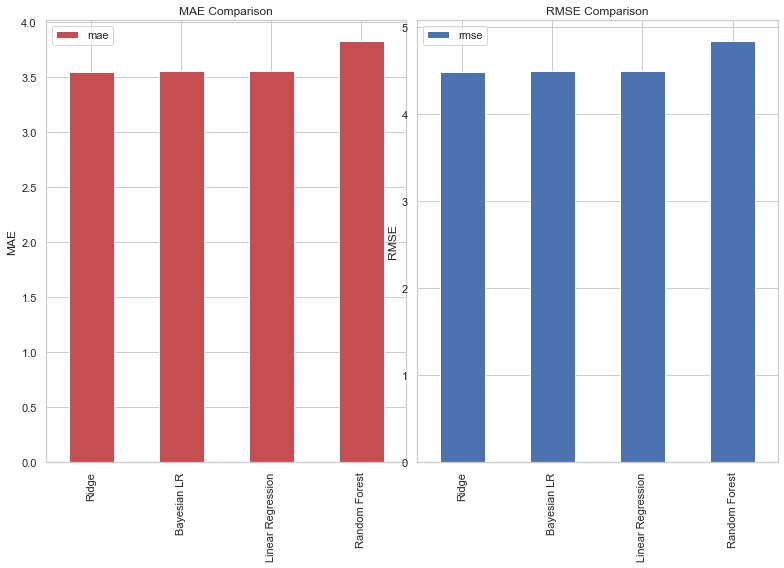

In [87]:
all_model_results = evaluate_trace(n_trace, X_train, X_test, y_train, y_test, results)

In [75]:
all_model_results

,mae,rmse
Linear Regression,3.55577,4.49314
Random Forest,3.8253,4.83371
Ridge,3.55137,4.48777
Bayesian LR,3.55563,4.49228


In [46]:
print('The Bayesian linear regression MAE score is {:0.2f}% higher than the OLS regression score.'.format(
    (100 * abs(results.loc['Bayesian LR', 'mae'] - results.loc['Linear Regression', 'mae'])) / results.loc['Linear Regression', 'mae']))

print('The Bayesian linear regression RMSE score is {:0.2f}% lower than the OLS regression score.'.format(
    (100 * abs(results.loc['Bayesian LR', 'rmse'] - results.loc['Linear Regression', 'rmse'])) / results.loc['Linear Regression', 'rmse']))

The Bayesian linear regression MAE score is 0.00% higher than the OLS regression score.
The Bayesian linear regression RMSE score is 0.01% lower than the OLS regression score.


There's not much difference in performance metrics between ridge regression, Bayesian linear regression and OLS regression. The limits to the full potential of Bayesian linear regression seem to stem from the fact that the input data is not very correlated with the target data, so it can only be so accurate. There may have also been some benefit in selecting a dataset that has a wider spread in output range, as this may provide a more exaggerated difference between the performance of the regression models in MAE and RMSE scores.

In [48]:
X_test.head()

,G3,failures,mother_edu,higher_edu,age,father_edu,go_out,Intercept
78,10,3,2,0,17,1,1,1
371,12,0,1,0,18,2,3,1
248,5,1,3,1,18,3,3,1
55,10,0,2,1,16,1,4,1
390,9,2,2,1,20,2,4,1


In [49]:
# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation):
    from statistics import mean
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['G3']
        
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('G3')
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)


    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)

    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value, size=1000)

    # Plot all the estimates
    plt.figure(figsize=(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 0.1, 
               linestyles = '--', colors = 'red',
               label = 'True Grade',
              linewidth = 2.5)
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 0.1, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Prediction information
    print('True Grade = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))


Test Observation:
G3            14
failures       0
mother_edu     4
higher_edu     1
age           17
father_edu     4
go_out         3
Intercept      1
Name: 329, dtype: int64
True Grade = 14
Average Estimate = 11.2583
5% Estimate = 4.5526    95% Estimate = 17.9737


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


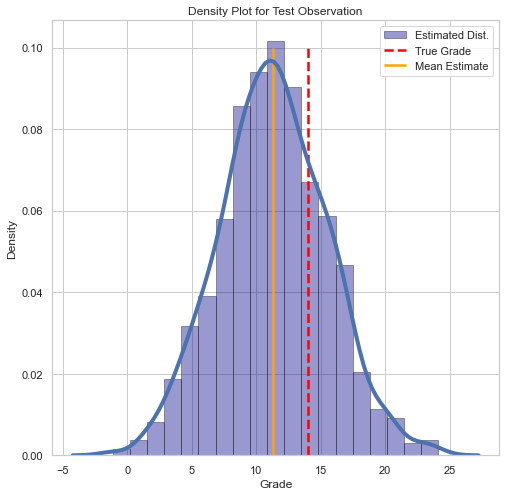

In [50]:
test_model(n_trace, X_test.iloc[42])

Test Observation:
G3             8
failures       0
mother_edu     2
higher_edu     1
age           16
father_edu     2
go_out         4
Intercept      1
Name: 124, dtype: int64
True Grade = 8
Average Estimate = 10.6413
5% Estimate = 3.6658    95% Estimate = 17.7550


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


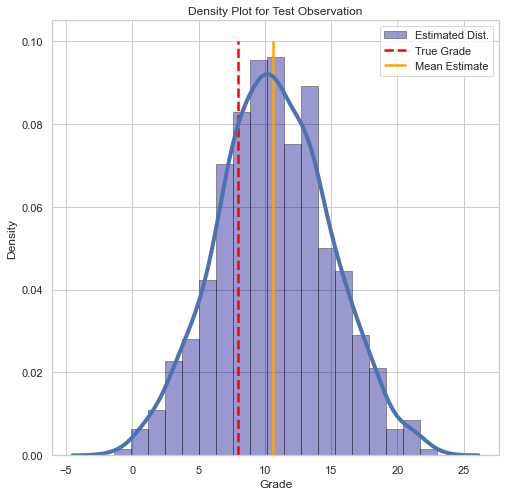

In [52]:
test_model(n_trace, X_test.iloc[16])